Hãy sử dụng các tập dữ liệu sau và tiến hành phân tích ANOVA 1 chiều

- [Excavation Depth and Archaeology](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan01.html)
- [Apple Orchard Experiment](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan02.html)
- [Red Dye Number 40](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan03.html)
- [Business Startup Costs](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan04.html)
- [Weights of Football Players](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan05.html)

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from scipy.stats import bartlett
from scipy.stats import levene

In [30]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
        
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();
        

    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()

    
    def shapiro(self):
        print('Kiểm định Shapori:')
        print('Giả thiết H0: ')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn')
        else:
            print('Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu không tuân theo luật phân phối chuẩn')
            print('-'*10)
            print('Do đó không thể chạy kiểm định ANOVA 1 chiều.')
        print('-'*50)


**[Excavation Depth and Archaeology](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan01.html)**

Bốn địa điểm khai quật khác nhau tại một khu vực khảo cổ ở New Mexico đã đưa ra những độ sâu sau (cm) cho những khám phá khảo cổ quan trọng.

- X1 = độ sâu tại Vị trí I
- X2 = độ sâu tại Vị trí II
- X3 = độ sâu tại Vị trí III
- X4 = độ sâu tại Vị trí IV

In [8]:
# Đọc file:
df1 = pd.read_excel('owan01.xls')
df1
# Vì kích thước các mẫu trong dữ liệu không bằng nhau nên không thể kiểm định ANOVA

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4
0,93,85.0,100.0,96.0
1,120,45.0,75.0,58.0
2,65,80.0,65.0,95.0
3,105,28.0,40.0,90.0
4,115,75.0,73.0,65.0
5,82,70.0,65.0,80.0
6,99,65.0,50.0,85.0
7,87,55.0,30.0,95.0
8,100,50.0,45.0,82.0
9,90,40.0,50.0,NaN


- [Apple Orchard Experiment](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan02.html)

Five types of root-stock were used in an apple orchard grafting experiment. The following data represent the extension growth (cm) after four years.
- X1 = extension growth for type I
- X2 = extension growth for type II
- X3 = extension growth for type III
- X4 = extension growth for type IV
- X5 = extension growth for type V

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$

$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$

In [9]:
# Đọc file:
df2 = pd.read_excel('owan02.xls')
df2

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,2569,2074,2505,2838,1532
1,2928,2885,2315,2351,2552
2,2865,3378,2667,3001,3083
3,3844,3906,2390,2439,2330
4,3027,2782,3021,2199,2079
5,2336,3018,3085,3318,3366
6,3211,3383,3308,3601,2416
7,3037,3447,3231,3291,3100


In [10]:
#Tách thành từng series
x1 = df2['X1'].dropna()
x2 = df2['X2'].dropna()
x3 = df2['X3'].dropna()
x4 = df2['X4'].dropna()
x5 = df2['X5'].dropna()

**Xây dựng giả thuyết kiểm định Shapiro**

$H_{0}: \text{Dữ liệu tuân theo phân phối chuẩn.}$

$H_{a}: \text{Dữ liệu không tuân theo phân phối chuẩn.}$

Xét X1:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


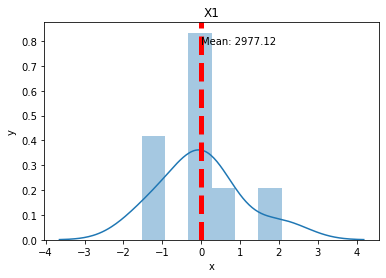

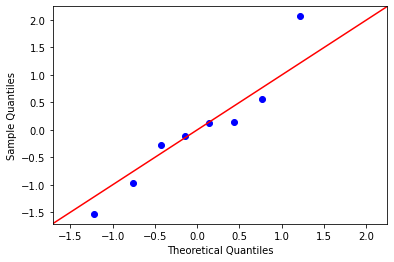

Kiểm định Shapori:
Giả thiết H0: 
stat=0.943, p=0.645
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X2:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


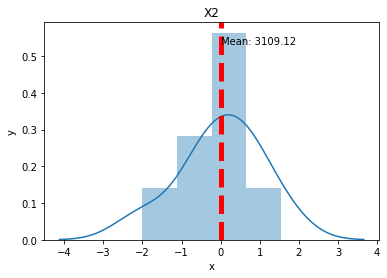

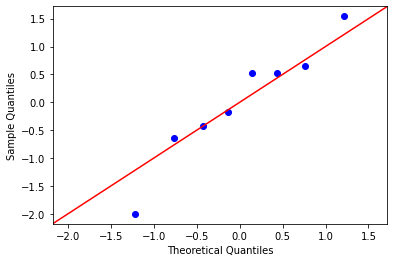

Kiểm định Shapori:
Giả thiết H0: 
stat=0.954, p=0.747
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X3:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


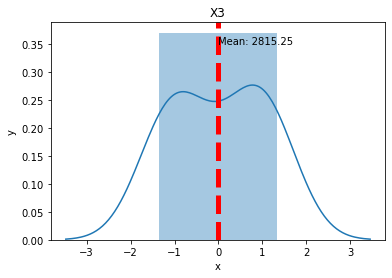

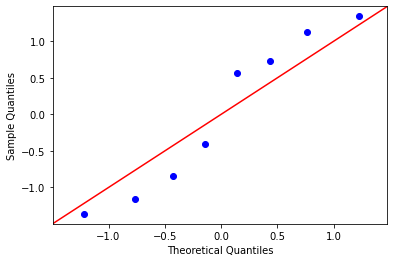

Kiểm định Shapori:
Giả thiết H0: 
stat=0.905, p=0.317
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X4:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


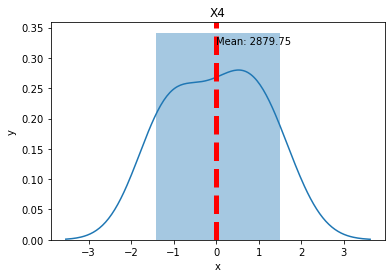

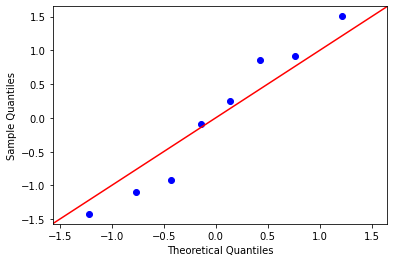

Kiểm định Shapori:
Giả thiết H0: 
stat=0.939, p=0.599
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X5:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


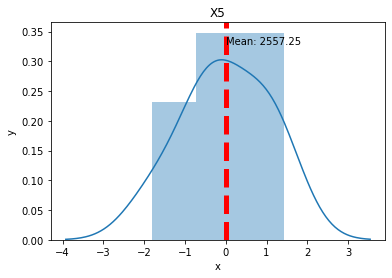

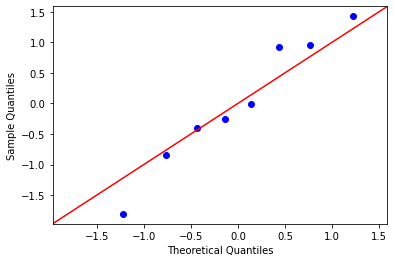

Kiểm định Shapori:
Giả thiết H0: 
stat=0.959, p=0.803
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------


In [11]:
print('Xét X1:')
X1 = thongke(x1)
X1.hist()
X1.qq()
X1.shapiro()

print('Xét X2:')
X2 = thongke(x2)
X2.hist()
X2.qq()
X2.shapiro()

print('Xét X3:')
X3 = thongke(x3)
X3.hist()
X3.qq()
X3.shapiro()

print('Xét X4:')
X4 = thongke(x4)
X4.hist()
X4.qq()
X4.shapiro()

print('Xét X5:')
X5 = thongke(x5)
X5.hist()
X5.qq()
X5.shapiro()

**Xây dựng giả thuyết kiểm định Bartlett:**

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [16]:
print('Phương sai mỗi nhóm:')
a = ['X1','X2','X3','X4','X5']
b = [np.var(x, ddof=1) for x in [x1,x2,x3,x4,x5]]
c = pd.DataFrame(b,a)
print(c)
print('-'*50)

# Kiểm định Bartlett - Kiểm định tính đồng nhất của các phương sai:
print('Kiểm định Bartlett:')
bartlett_test = bartlett(x1,x2,x3,x4,x5)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue > 0.05):
    print('Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý phương sai các nhóm tương đồng nhau')
else:
    print('Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý phương sai các nhóm không tương đồng nhau')
    print('-'*10)
    print('Do đó không thể chạy kiểm định ANOVA 1 chiều.')
print('-'*50)

Phương sai mỗi nhóm:
                0
X1  200690.696429
X2  304785.839286
X3  154295.642857
X4  262156.214286
X5  368078.500000
--------------------------------------------------
Kiểm định Bartlett:
BartlettResult(statistic=1.505379741017298, pvalue=0.825688088344803)
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý phương sai các nhóm tương đồng nhau
--------------------------------------------------


**Xây dựng giả thuyết kiểm định ANOVA 1 chiều:**

$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $

$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$

In [7]:
# Kiểm định ANOVA 1 chiều:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway(x1,x2,x3,x4,x5)
print('stat=%.3f, p=%.3f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0 điều này ngụ ý: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng thống kê bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=1.314, p=0.284
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0 điều này ngụ ý: Các cặp giá trị trung bình bằng nhau
--------------------------------------------------


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('-'*50)
print('Bảng kiểm định ANOVA 1 chiều:')
model = ols('x1 ~ x1 + x2 + x3 + x4',                 # Model formula
            data = df2).fit()    
anova_result = sm.stats.anova_lm(model, typ=2)
anova_result

--------------------------------------------------
Bảng kiểm định ANOVA 1 chiều:


,sum_sq,df,F,PR(>F)
x1,4.445576e+05,1.0,8.194722e+27,2.972825e-42
x2,1.407860e-25,1.0,2.595169e-03,9.625733e-01
x3,7.215022e-27,1.0,1.329976e-04,9.915227e-01
x4,3.058545e-25,1.0,5.637948e-03,9.448727e-01
Residual,1.627478e-22,3.0,NaN,NaN


In [10]:
model.summary()

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.474e+27
Date:                Wed, 12 May 2021   Prob (F-statistic):           3.12e-42
Time:                        19:47:22   Log-Likelihood:                 197.65
No. Observations:                   8   AIC:                            -385.3
Df Residuals:                       3   BIC:                            -384.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.364e-12   3.34e-11     -0.041      0.970   -1.08e-10    1.05e-10
x1             1.0000    1.1e-14   9.05e+13      0.000       1.000       1.000
x2         -4.441e-16   8.72e-15     -0.051      0.963   -2.82e-14    2.73e-14
x3          -1.11e-16   9.63e-15     -0.012      0.992   -3.07e-14    3.05e-14
x4         -6.384e-16    8.5e-15     -0.075      0.945   -2.77e-14    2.64e-14
==============================================================================
Omnibus:                        5.093   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                1.151
Skew:                           0.250   Prob(JB):                        0.562
Kurtosis:                       1.210   Cond. No.                     7.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Red Dye Number 40](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan03.html)

S.W. Laagakos and F. Mosteller of Harvard University fed mice different doses of red dye number 40 and recorded the time of death in weeks. Results for female mice, dosage and time of death are shown in the data
- X1 = time of death for control group
- X2 = time of death for group with low dosage
- X3 = time of death for group with medium dosage
- X4 = time of death for group with high dosage

Xây dựng giả thuyết:

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} $$ 

$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

In [25]:
# Đọc file:
df3 = pd.read_excel('owan03.xls')
df3
# Vì kích thước các mẫu trong dữ liệu không bằng nhau nên không thể kiểm định ANOVA

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4
0,70,49.0,30.0,34.0
1,77,60.0,37.0,36.0
2,83,63.0,56.0,48.0
3,87,67.0,65.0,48.0
4,92,70.0,76.0,65.0
5,93,74.0,83.0,91.0
6,100,77.0,87.0,98.0
7,102,80.0,90.0,102.0
8,102,89.0,94.0,NaN
9,103,NaN,97.0,NaN


[Business Startup Costs](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan04.html)

The following data represent business startup costs (thousands of dollars) for shops.
- X1 = startup costs for pizza
- X2 = startup costs for baker/donuts
- X3 = startup costs for shoe stores
- X4 = startup costs for gift shops
- X5 = startup costs for pet stores

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$ (tất cả các trung bình tổng thể đều bằng nhau)

$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

In [26]:
# Đọc file:
df4 = pd.read_excel('owan04.xls')
df4
# Vì kích thước các mẫu trong dữ liệu không bằng nhau nên không thể kiểm định ANOVA

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


[Weights of Football Players](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/owan/frames/owan05.html)

The following data represent weights (pounds) of a random sample of professional football players on the following teams.
- X1 = weights of players for the Dallas Cowboys
- X2 = weights of players for the Green Bay Packers
- X3 = weights of players for the Denver Broncos
- X4 = weights of players for the Miami Dolphins
- X5 = weights of players for the San Francisco Forty Niners

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$ (tất cả các trung bình tổng thể đều bằng nhau)

$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

In [27]:
# Đọc file:
df5 = pd.read_excel('owan05.xls')
df5

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,250,260,270,260,247
1,255,271,250,255,249
2,255,258,281,265,255
3,264,263,273,257,247
4,250,267,257,268,244
5,265,254,264,263,245
6,245,255,233,247,249
7,252,250,254,253,260
8,266,248,268,251,217
9,246,240,252,252,208


In [28]:
#Tách thành từng series
x1 = df5['X1'].dropna()
x2 = df5['X2'].dropna()
x3 = df5['X3'].dropna()
x4 = df5['X4'].dropna()
x5 = df5['X5'].dropna()

**Xây dựng giả thuyết kiểm định Shapiro**

$H_{0}: \text{Dữ liệu tuân theo phân phối chuẩn.}$

$H_{a}: \text{Dữ liệu không tuân theo phân phối chuẩn.}$

Xét X1:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


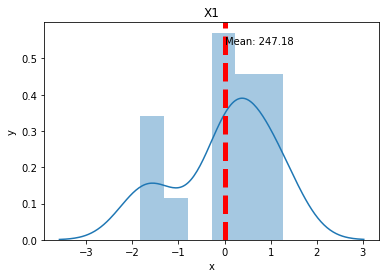

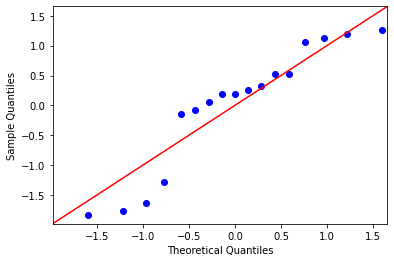

Kiểm định Shapori:
Giả thiết H0: 
stat=0.877, p=0.029
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu không tuân theo luật phân phối chuẩn
----------
Do đó không thể chạy kiểm định ANOVA 1 chiều.
--------------------------------------------------
Xét X2:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


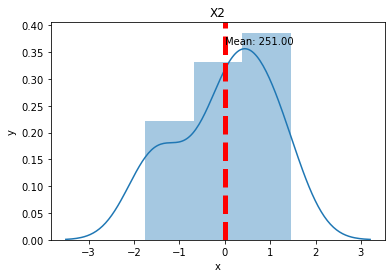

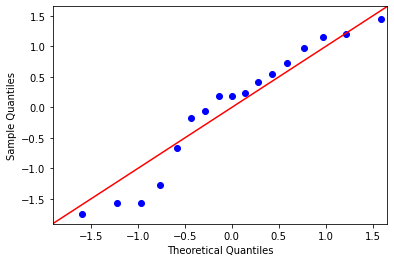

Kiểm định Shapori:
Giả thiết H0: 
stat=0.923, p=0.163
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X3:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


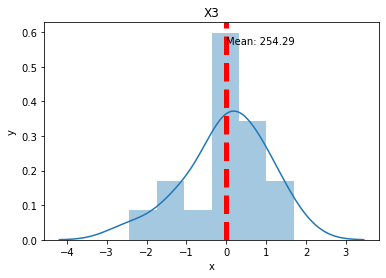

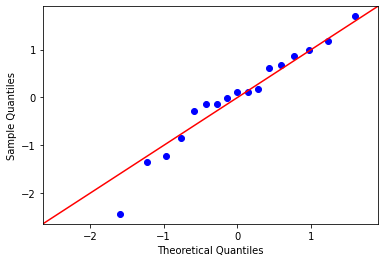

Kiểm định Shapori:
Giả thiết H0: 
stat=0.962, p=0.663
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X4:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


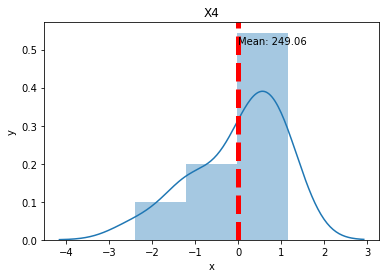

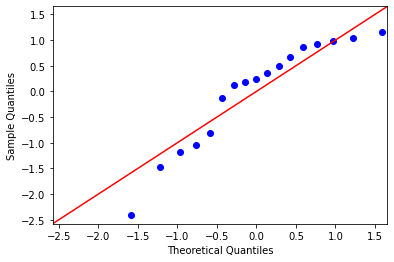

Kiểm định Shapori:
Giả thiết H0: 
stat=0.899, p=0.065
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------
Xét X5:


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


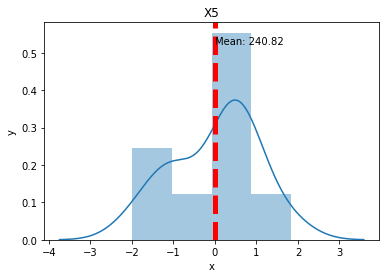

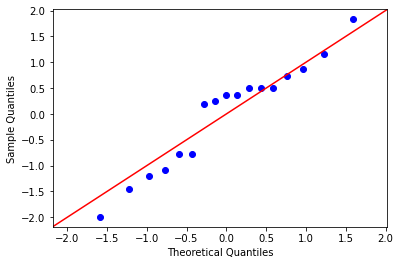

Kiểm định Shapori:
Giả thiết H0: 
stat=0.942, p=0.338
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn
--------------------------------------------------


In [31]:
print('Xét X1:')
X1 = thongke(x1)
X1.hist()
X1.qq()
X1.shapiro()

print('Xét X2:')
X2 = thongke(x2)
X2.hist()
X2.qq()
X2.shapiro()

print('Xét X3:')
X3 = thongke(x3)
X3.hist()
X3.qq()
X3.shapiro()

print('Xét X4:')
X4 = thongke(x4)
X4.hist()
X4.qq()
X4.shapiro()

print('Xét X5:')
X5 = thongke(x5)
X5.hist()
X5.qq()
X5.shapiro()

In [20]:
#Kiểm định Leneve:
print('Vì X1 không tuân theo phân phối chuẩn. Do đó không thể chạy kiểm định ANOVA 1 chiều.')

Vì X1 không tuân theo phân phối chuẩn. Do đó không thể chạy kiểm định ANOVA 1 chiều.
